# Principales tipos de Gráficos
Actividad Lección 3 || Fundamentos de Big Data

Objetivos:
* Conocer los tipos de Gráficos

Datos del alumno:
* Víctor Luque Martín
* Máster Avanzado en Programación en Python para Hacking, BigData y Machine Learning

Fecha: 09/07/2022

## Parte 1.

El/la alumno/a deberá enviar un .ipynb con Gráficos en Python similares a las vistas en la lección actual. <br><br>
Podría ser un ejemplo similar al de alguno de los apuntes. <br><br>
Pero, lo ideal será tratar de buscar algo de información en Internet para presentar un ejemplo diferente.

# Solución Parte 1
Para comenzar se deben instalar las siguientes dependencias para trabajar con este cuaderno de jupyter:
* [Requests](https://pypi.org/project/requests/)
* [Matplotlib](https://pypi.org/project/matplotlib/)
* [Numpy](https://pypi.org/project/numpy/)
* [Pillow](https://pypi.org/project/Pillow/)
* [Pandas](https://pypi.org/project/pandas/)
* [Seaborn](https://pypi.org/project/seaborn/)

In [357]:
import requests
import matplotlib.pyplot as plt
import random
import numpy as np
import PIL.Image as Image
from io import BytesIO
import pandas as pd
import seaborn as sns

Para la primera parte se van a utilizar datos ofrecidos por la REST API [PokeAPI](https://pokeapi.co/) que permite obtener información muy detallada sobre las entidades que podemos encontrar en los videojuegos de la saga.

No requiere de una autenticación es posible acceder a la información realizando peticiones GET sencillas.

Tendremos en cuenta dos urls principales
* La primera para obtener información sobre el pokemon, estadísticas, movimientos...
* La segunda para obtener información sobre el tipo de especie del pokemon.

In [358]:
url_pokemons = "https://pokeapi.co/api/v2/pokemon/"
url_especies = "https://pokeapi.co/api/v2/pokemon-species/"

Para trabajar de manera más sencilla con los datos al obtenerlos desde la API, crearemos un objeto Pokemon para trabajar mejor con información de cada pokemon más adelante.

Se ha empleado la librería [dataclasses](https://docs.python.org/3/library/dataclasses.html) que añade algunas mejoras para instanciar clases en Python, para más información consulte el [siguiente enlace](https://towardsdatascience.com/9-reasons-why-you-should-start-using-python-dataclasses-98271adadc66)

In [359]:
from dataclasses import dataclass, field

@dataclass
class Pokemon:
    id: int = field(compare=False, hash=False)
    nombre: str = field(compare=False, hash=False)
    altura: int = field(repr=False)
    peso: int = field(repr=False)
    n_movimientos: int = field(repr=False)
    hp: int = field(repr=False)
    attack: int = field(repr=False)
    defense: int = field(repr=False)
    sp_attack: int = field(repr=False)
    sp_defense: int = field(repr=False)
    speed: int = field(repr=False)
    image: str = field(repr=False)
    generation: int = field(repr=False)
    legendary: bool = field(default_factory=bool, repr=False)

    def __post_init__(self):
        self.nombre = self.nombre.capitalize()
        self.altura = self.altura / 10
        self.peso = self.peso / 10
        self.total_stats = self.hp + self.attack + self.defense + self.sp_attack + self.sp_defense + self.speed


A continuación, declaramos una función para obtener información desde PokeAPI a traves de un ID de pokemon (número) o desde un nombre, está función nos devolverá un objeto de tipo Pokemon en caso de que no haya ocurrido un error.

In [360]:
def obtener_pokemon(id_pokemon: int or str) -> Pokemon:
    url = url_pokemons + str(id_pokemon)
    respuesta = requests.get(url)
    if respuesta.status_code == 200:
        pokemon = respuesta.json()
        url_2 = url_especies + str(id_pokemon)
        especie = requests.get(url_2).json()
        return Pokemon(
            id = pokemon["id"],
            nombre = pokemon["name"],
            altura = pokemon["height"],
            peso = pokemon["weight"],
            n_movimientos = len(pokemon["moves"]),
            hp = pokemon["stats"][0]["base_stat"],
            attack = pokemon["stats"][1]["base_stat"],
            defense = pokemon["stats"][2]["base_stat"],
            speed = pokemon["stats"][3]["base_stat"],
            sp_attack = pokemon["stats"][4]["base_stat"],
            sp_defense = pokemon["stats"][5]["base_stat"],
            image = pokemon["sprites"]["front_default"],
            generation = especie["generation"]["url"].split("/")[-2],
            legendary = especie["is_legendary"]
        )
    return None

Para esta parte trabajaremos sobre una pequeña muestra de datos, por lo que se ha diseñado una función que devuelve una lista de n números aleatorios para obtener datos de pokemons de forma aleatoria.

In [361]:
def ids_aleatorios(n: int) -> list:
    return random.sample(range(1, 721), n)

Utilizando compresión de listas obtenemos la lista de pokemons aleatorios.

In [362]:
lista_pokemons = [obtener_pokemon(id_pokemon) for id_pokemon in ids_aleatorios(20)]
lista_pokemons

[Pokemon(id=219, nombre='Magcargo'),
 Pokemon(id=392, nombre='Infernape'),
 Pokemon(id=23, nombre='Ekans'),
 Pokemon(id=401, nombre='Kricketot'),
 Pokemon(id=515, nombre='Panpour'),
 Pokemon(id=358, nombre='Chimecho'),
 Pokemon(id=179, nombre='Mareep'),
 Pokemon(id=60, nombre='Poliwag'),
 Pokemon(id=701, nombre='Hawlucha'),
 Pokemon(id=250, nombre='Ho-oh'),
 Pokemon(id=687, nombre='Malamar'),
 Pokemon(id=487, nombre='Giratina-altered'),
 Pokemon(id=466, nombre='Electivire'),
 Pokemon(id=270, nombre='Lotad'),
 Pokemon(id=127, nombre='Pinsir'),
 Pokemon(id=582, nombre='Vanillite'),
 Pokemon(id=90, nombre='Shellder'),
 Pokemon(id=564, nombre='Tirtouga'),
 Pokemon(id=176, nombre='Togetic'),
 Pokemon(id=10, nombre='Caterpie')]

Es posible convertir la lista de pokemons que hemos construido anteriormente en un DataFrame de pandas, no obstante trabajaremos en esta parte con la lista de Pokemons en vez de con el Dataframe

In [363]:
pokemon_df = pd.DataFrame(lista_pokemons)
pokemon_df.head()

,id,nombre,altura,peso,n_movimientos,hp,attack,defense,sp_attack,sp_defense,speed,image,generation,legendary
0,219,Magcargo,0.8,55.0,72,60,50,120,80,30,90,https://raw.githubusercontent.com/PokeAPI/spri...,2,False
1,392,Infernape,1.2,55.0,91,76,104,71,71,108,104,https://raw.githubusercontent.com/PokeAPI/spri...,4,False
2,23,Ekans,2.0,6.9,82,35,60,44,54,55,40,https://raw.githubusercontent.com/PokeAPI/spri...,1,False
3,401,Kricketot,0.3,2.2,9,37,25,41,41,25,25,https://raw.githubusercontent.com/PokeAPI/spri...,4,False
4,515,Panpour,0.6,13.5,74,50,53,48,48,64,53,https://raw.githubusercontent.com/PokeAPI/spri...,5,False


A continuación se muestran de forma visual los pokemos con los que vamos a trabajar.

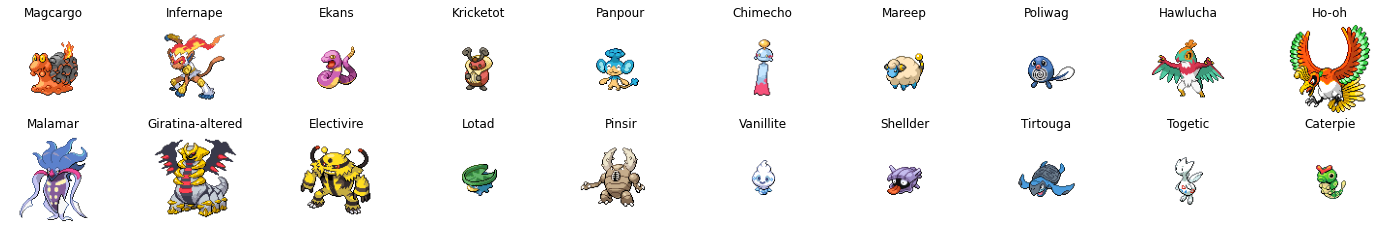

In [364]:
plt.figure(figsize=(25, 20))
for i, pokemon in enumerate(lista_pokemons):
    plt.subplot(10, 10, i+1)
    image = Image.open(BytesIO(requests.get(pokemon.image).content))
    plt.imshow(image)
    plt.axis("off")
    plt.title(pokemon.nombre)
plt.show()

Para la primera visualización, se mostrarán seis gráficas de tarta, una para cada estadística (vida, ataque, defensa, velocidad, ataque especial y defensa especial) con el TOP 5 de pokemons con mayor puntuación en cada una de ellas.

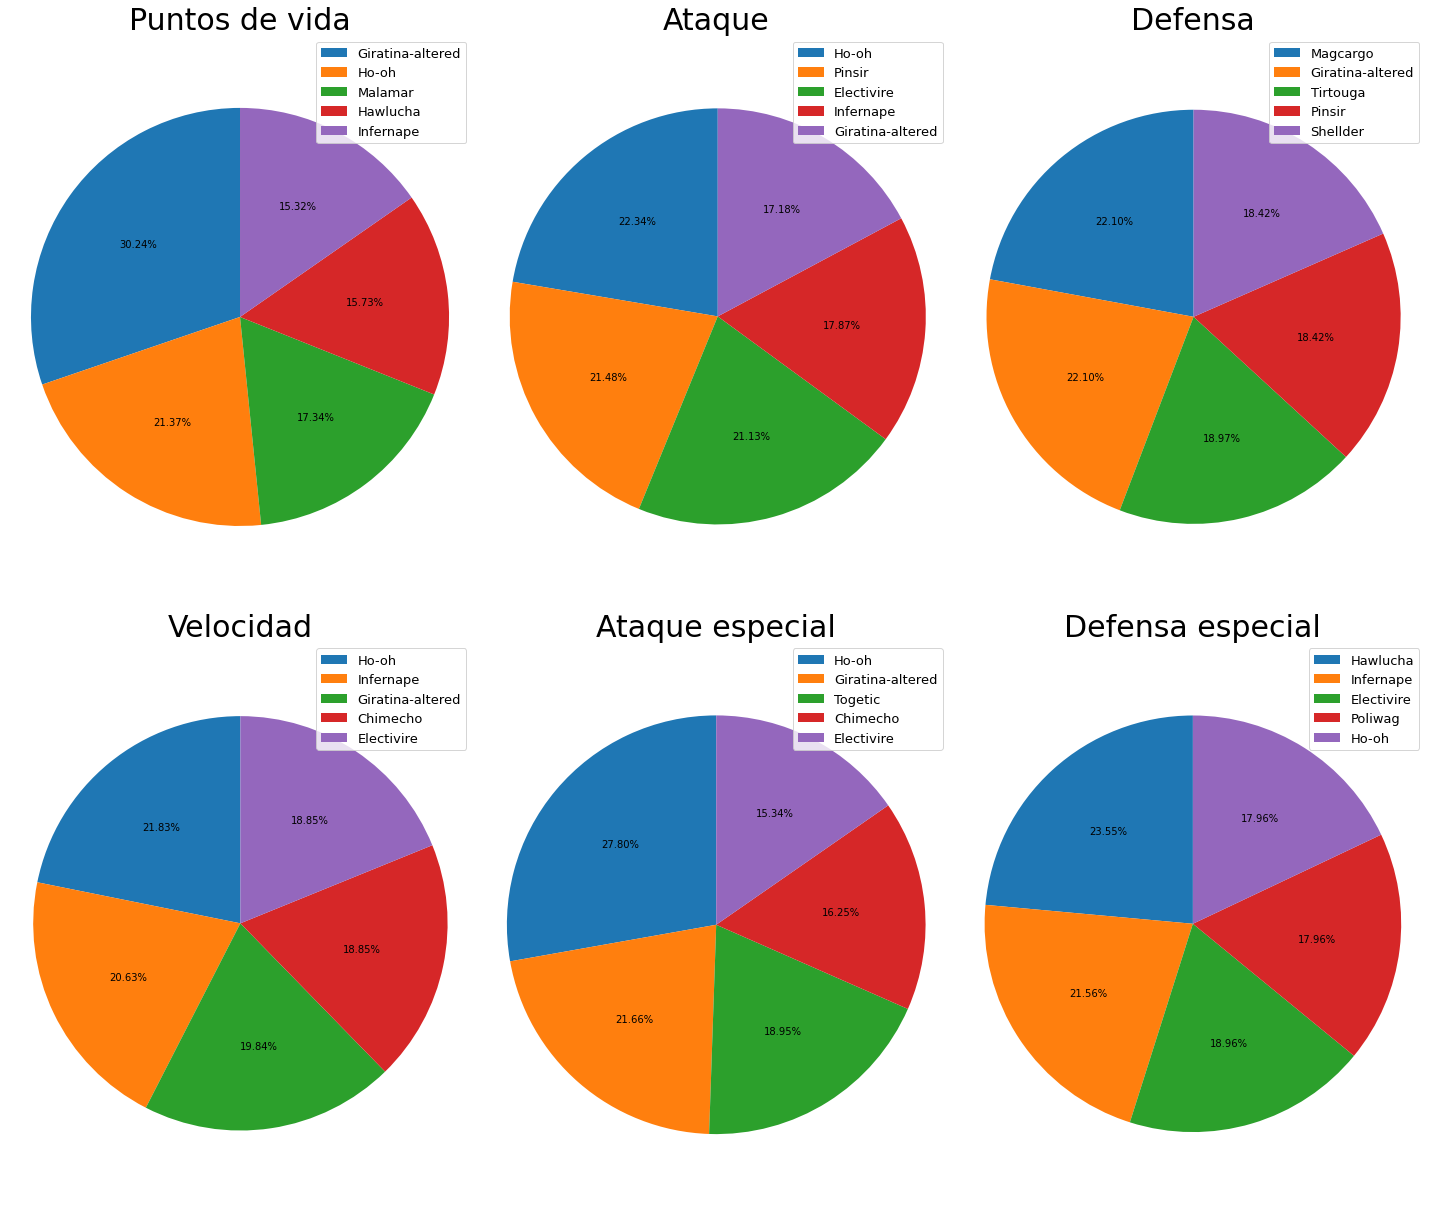

In [365]:
plt.figure(figsize=(20, 17))
nombre_stat = {
    "hp": "Puntos de vida",
    "attack": "Ataque",
    "defense": "Defensa",
    "speed": "Velocidad",
    "sp_attack": "Ataque especial",
    "sp_defense": "Defensa especial"
}
for i, stat in enumerate(["hp", "attack", "defense", "speed", "sp_attack", "sp_defense"]):
    top_5 = sorted(lista_pokemons, key=lambda pokemon: getattr(pokemon, stat), reverse=True)[:5]
    top_5_stats = [getattr(pokemon, stat) for pokemon in top_5]
    top_5_names = [pokemon.nombre for pokemon in top_5]
    plt.subplot(2, 3, i + 1)
    plt.title(nombre_stat[stat], fontsize=30)
    plt.pie(top_5_stats, 
            startangle=90,
            autopct="%1.2f%%",
    )
    plt.legend(top_5_names, loc="upper right", fontsize=13)
    plt.axis("equal")
    plt.tight_layout()

plt.show()

La siguiente gráfica de barras de forma ordenada los pokemons con más capacidad para aprender movimientos o ataques.

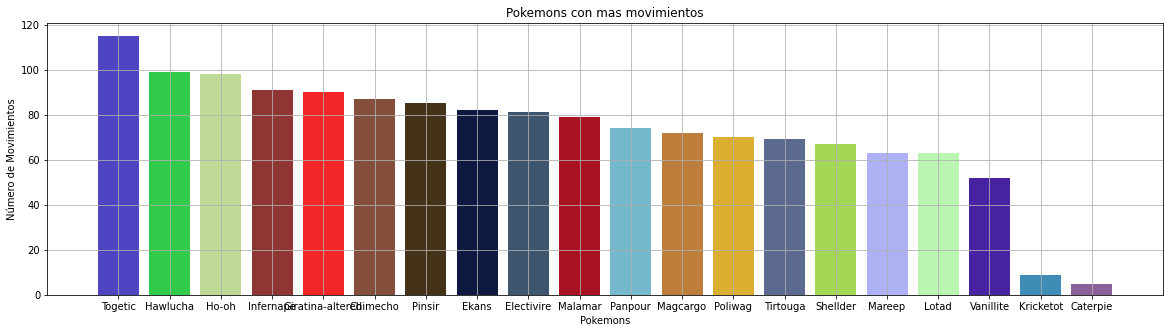

In [366]:
plt.figure(figsize=(20, 5))
plt.title("Pokemons con mas movimientos")
plt.xlabel("Pokemons")
plt.ylabel("Número de Movimientos")
pokemon_ordenados = sorted(lista_pokemons, key=lambda pokemon: pokemon.n_movimientos, reverse=True)
movimientos_ordenados = [pokemon.n_movimientos for pokemon in pokemon_ordenados]
nombres_ordenados = [pokemon.nombre for pokemon in pokemon_ordenados]
plt.bar(nombres_ordenados, movimientos_ordenados, color=np.random.rand(len(lista_pokemons), 3))
plt.grid(True)
plt.show()

Continuando con un gráfico en 3D, mostraremos los top 10 pokemon con mayor altura, peso y puntos de salud.

Notas:
* La altura es representada en metros, pero desde PokeAPI viene en decimetros
* El peso es representada en kilogramos, pero desde PokeAPI viene en hectogramos

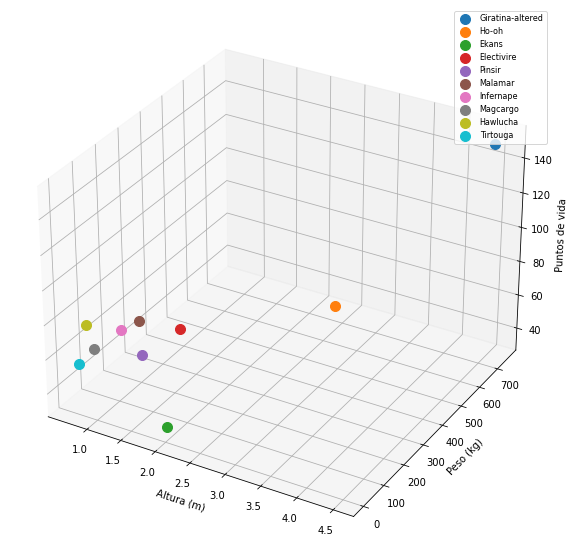

In [367]:
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.set_xlabel('Altura (m)')
ax.set_ylabel('Peso (kg)')
ax.set_zlabel('Puntos de vida')
pokemon_ordenados = sorted(lista_pokemons, key=lambda pokemon: (pokemon.altura, pokemon.peso, pokemon.hp), reverse=True)[:10]
altura_ordenados = [pokemon.altura for pokemon in pokemon_ordenados]
peso_ordenados = [pokemon.peso for pokemon in pokemon_ordenados]
hp_ordenados = [pokemon.hp for pokemon in pokemon_ordenados]
nombres_ordenados = [pokemon.nombre for pokemon in pokemon_ordenados]
for i in range(len(pokemon_ordenados)):
    ax.scatter(altura_ordenados[i], peso_ordenados[i], hp_ordenados[i], label=nombres_ordenados[i], s=100, marker="o")
ax.legend(nombres_ordenados, loc="upper right", fontsize=8)
plt.show()

Finalmente, mostraremos la imagen del Pokemon con mejores estadisticas, es decir la suma de cada una de ellas.

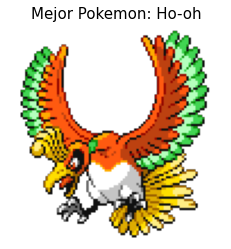

In [368]:
best_pokemon = sorted(lista_pokemons, key=lambda pokemon: pokemon.total_stats, reverse=True)[0]
image = Image.open(BytesIO(requests.get(best_pokemon.image).content))
plt.title(f"Mejor Pokemon: {best_pokemon.nombre}", fontsize=15)
plt.imshow(image)
plt.axis("off")
plt.show()

## Parte 2

### Pregunta 2.1.
Encuentra un ejemplo donde poder mostrar estos gráficos (diagramas de cajas) con Python (el que quieras) simplemente se pide mostrar esas Gráficos con el ejemplo.

### Respuesta 2.1.
Un diagrama de cajas es un método para visualizar datos númericos a través de sus cuartiles, observando rápidamente la siguiente información:
* Rango: Limites donde los datos están comprendidos
* Datos Atípicos: Datos que sobresalen de los limites del rango, casos aislados
* Rango intercuartil: La famosa "Caja" que encierra los cuartiles
* Cuartiles: Representación del 25%, Mediana y 75% de los datos
* Minimo y Máximo: Limites del Rango (No son valores atípicos)

Para mantener una relacion con los datos tratados anteriormente sobre Pokemon, se ha tomado de referencia el dataset de Kaggle [Pokemon with stats](https://www.kaggle.com/datasets/abcsds/pokemon) para obtener los datos de una manera más rápida y eficiente a como lo haríamos a través de la API de PokeAPI.

En caso de querer realizar este tipo de consultas a PokeAPI, es recomendable trabajar de forma asyncrona, de lo contrario el tiempo de obtención de los datos sobrepasa de los 2 minutos.

Primeramente, cargaremos el fichero Pokemon.csv ubicado en la ruta relativa `resources/Pokemon.csv`.

In [369]:
# Read Pokemon.csv at resources
pokemon_csv = pd.read_csv("resources/Pokemon.csv")
pokemon_csv.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Tras la carga de los datos, se utiliza la librería de Seaborn para representar diferentes diagramas de cajas mostrando las estadisticas de cada generación.<br>
En total serán 6 diagramas:
* Ataque
* Defensa
* Velocidad
* Ataque Especial
* Defensa Especial
* Puntos de Salud

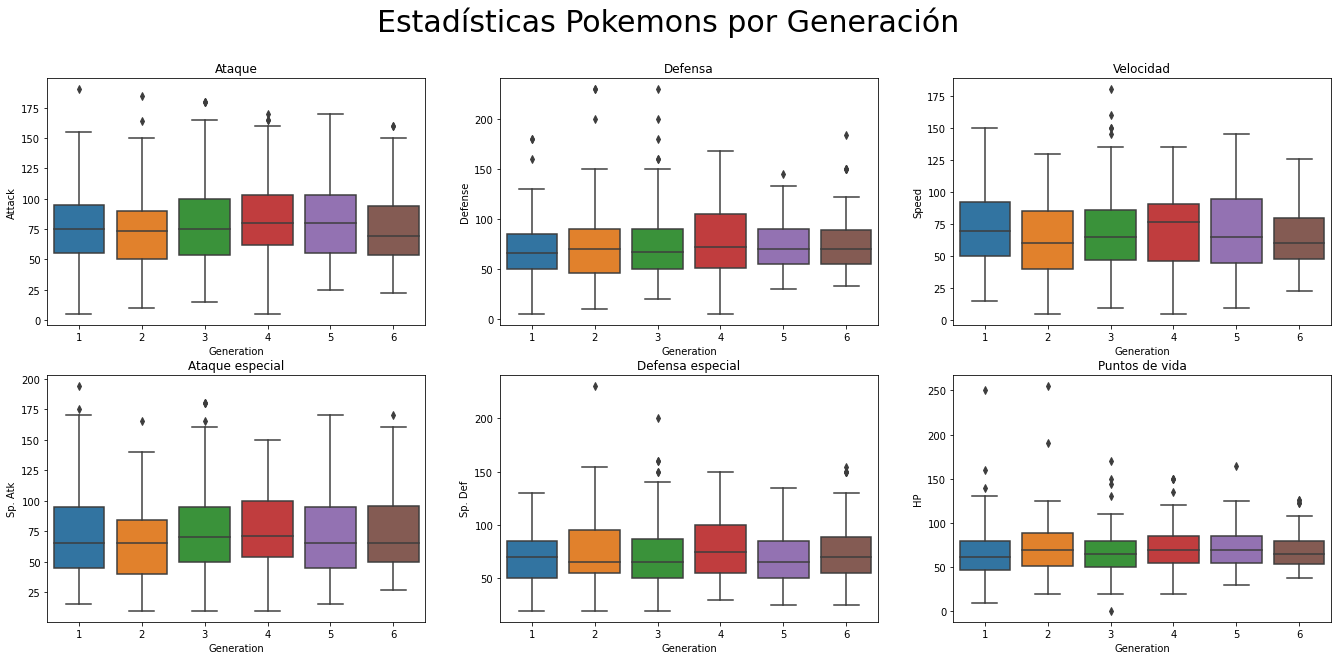

In [370]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(23, 10))
fig.suptitle("Estadísticas Pokemons por Generación", fontsize=30)
sns.boxplot(ax=axes[0, 0], data=pokemon_csv, x="Generation", y="Attack").set_title("Ataque")
sns.boxplot(ax=axes[0, 1], data=pokemon_csv, x="Generation", y="Defense").set_title("Defensa")
sns.boxplot(ax=axes[0, 2], data=pokemon_csv, x="Generation", y="Speed").set_title("Velocidad")
sns.boxplot(ax=axes[1, 0], data=pokemon_csv, x="Generation", y="Sp. Atk").set_title("Ataque especial")
sns.boxplot(ax=axes[1, 1], data=pokemon_csv, x="Generation", y="Sp. Def").set_title("Defensa especial")
sns.boxplot(ax=axes[1, 2], data=pokemon_csv, x="Generation", y="HP").set_title("Puntos de vida")
plt.show()


### Pregunta 2.2.
¿Que son Q1, Q2, Q3?

### Respuesta 2.2.
En los diagramas de cajas los cuartiles son representados como Q1, Q2, Q3:
* Q1 hace referencia al 25% de los datos
* Q2 o mediana hace referencia al 50% de los datos
* Q3 hace referencia al 75% de los datos
El rango comprendido entre Q1 y Q3 se le conoce como rango interquartílico (Q3-Q1) (RIC)

### Pregunta 2.3.
¿Que son los "outliers"? ¿Son mostrados en estos diagramas de cajas?

### Respuesta 2.3.
Los "outliers" o "atípicos" son valores extremadamente atípicos que exceden de los limites entre el rango interquartílico.
Siguen la siguiente formula:
* Q1 - 3 * RIC o Q3 + 3 * RIC
A modo de ejemplo:
* Inferior: 7-3*2 = 2
* Superior: 9+3*2 = 15

Son representados como puntos fuera del RIC. 
En el anterior gráfico "Estadísticas Pokemons por Generación" son representados como rombos negros.

### Pregunta 2.4.
Comenta brevemente cualquier otra cosa que te llame la atención de estos diagramas, o añade algo de información.

Si no se te ocurre nada, si quieres puedes comentar cómo se llaman estos diagramas de cajas de otra forma distinta en idioma español o incluso en idioma inglés (por ejemplo).

### Respuesta 2.4.
Lo más característico de este tipo de gráficos que permiten representar el mínimo, máximo y cuartiles del conjunto de datos sin tener que calcularlos previamente.


Ponen en una dimensión los datos reflejados en un histograma, permitiendo identificar al 50% de los datos entre los límites de la caja.


Son conocidos tambien como diagramas de cajas y bigotes o "box plot".